# ふるさと納税クロスABC分析

ここでは，クロスABC分析の例として自治体別のふるさと納税のデータを用いて簡単な分類をおこないます．寄付金額と寄付件数を指標として，寄付金額，寄付件数がともに多い自治体を洗い出したり，寄付金額は多いけれども寄付件数が少ない自治体，あるいはその逆の自治体を抽出します．

## 0. 設定(ライブラリのインポート)

In [1]:
from crossabc import CrossABC
import matplotlib.pyplot as plt
import pandas as pd

## 1. データ紹介

今回扱うのデータは「ふるさと納税」に関するものであり，各自治体の2008年度から2019年度までの寄付金額(amount_yyyy，単位は千円)と寄付件数(number_yyyy，単位は件)が入力されています．なお本データは，総務省のふるさと納税ポータルサイトの[関連資料](https://www.soumu.go.jp/main_sosiki/jichi_zeisei/czaisei/czaisei_seido/furusato/archive/)を元に加工しました．また，City列に県の名前が入力されている場合は，その県に対して寄付されたことを表します．

In [2]:
df = pd.read_csv("example.csv", index_col=1)

df.head(3)

,Prefecture,amount_2008,amount_2009,amount_2010,amount_2011,amount_2012,amount_2013,amount_2014,amount_2015,amount_2016,...,number_2010,number_2011,number_2012,number_2013,number_2014,number_2015,number_2016,number_2017,number_2018,number_2019
City,,,,,,,,,,,,,,,,,,,,,
北海道,北海道,4660,52685,2770,3670,5688,10792,1798,2144,13457,...,25.0,32.0,139.0,267.0,64.0,39.0,51,98,3996,324
札幌市,北海道,397801,514419,11073,100330,121572,139244,200533,106100,364428,...,88.0,247.0,365.0,177.0,170.0,200.0,300,247,1219,2240
函館市,北海道,5177,4745,3301,3846,5139,14880,10573,17032,11380,...,47.0,53.0,66.0,150.0,257.0,240.0,207,4211,10744,43753


## 2. crossabcモジュール作成

2019年度について，寄付金額(amount_2019)寄付件数(number_2019)がどちらも多かった自治体を抽出します．このようなとき活躍するのが，**crossabcモジュール**です．crossabcはクロスABC分析をおこなうためのものですが，クロスABC分析がどのような分析手法か知りたい方はこちらの[文献1](https://biz.moneyforward.com/accounting/basic/22225/)，[文献2](https://www.mapmarketing.co.jp/mm-blog/bunseki/kurosu-abc-buinseki/)をお読みください．それでは始めに分析用データフレームを作成します．crossabcモジュールは列数が2でないとエラーを返すので，必ず列数を2にしてください．

In [3]:
analyzed_df = df[["amount_2019", "number_2019"]]

analyzed_df.head(3)

,amount_2019,number_2019
City,,
北海道,8209,324
札幌市,456499,2240
函館市,579859,43753


次に，CrossABCモジュールを作成します．

In [4]:
cc = CrossABC(analyzed_df)

## 3. 分析

### 3.1 基礎分析

分析のはじめに，「寄付金額ランク $i$ と寄付件数ランク $j$ に属する自治体がいくつあるのか」を表したヒストグラムを表示します．

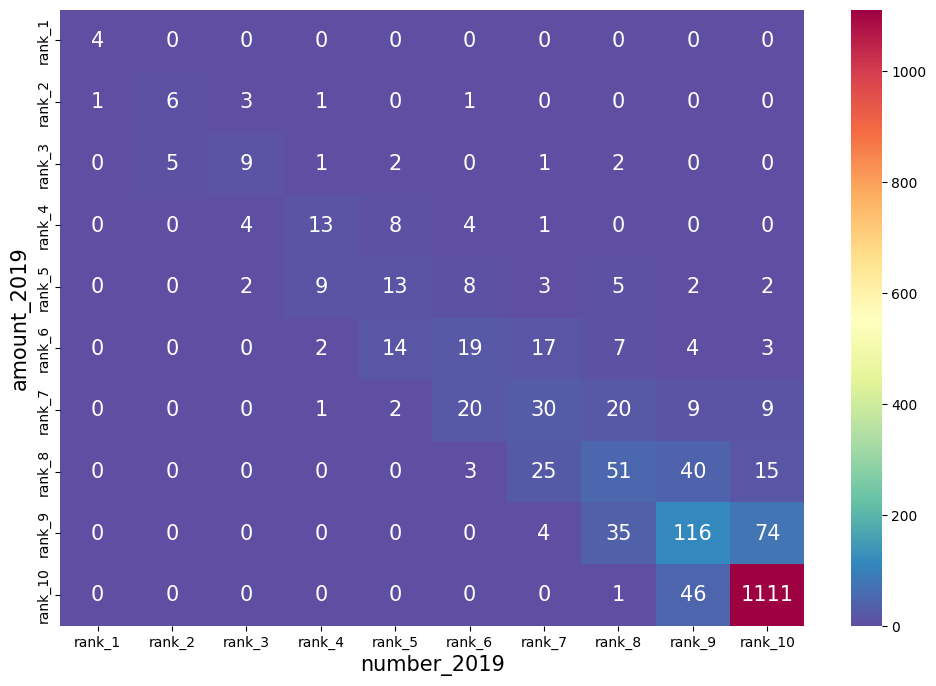

In [5]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
cc.draw_histgram(ax=ax, mode=0)
plt.show()

ヒストグラムの左上のように，寄付金額も寄付件数も多いグループには果たしてどのような自治体が含まれているでしょうか．また，そのような自治体に共通するような特徴は何でしょうか．このようなとき，```get_elements()``` メソッドを活用します．

In [6]:
star_df = cc.get_elements(ppm="star")

star_df.head()

,amount_2019,number_2019,rank_amount_2019,rank_number_2019
City,,,,
都城市,10645341,503916,1,1
白糠町,6733389,460533,1,1
紋別市,7737695,448803,1,1
泉佐野市,18496917,307630,1,1
根室市,6589107,413575,2,1


上位にいる自治体は **都城市，白糠町，紋別市，泉佐野市, 根室市 ...** であることがわかりました．

### 3.2 詳細分析

それではより詳細に，寄付金額と寄付件数の2つの観点で上位1%に属する自治体を抽出します．```draw_histgram()```メソッドに閾値($0 \leq $ ```threshold``` $\leq 1$)を設定すると，閾値に合わせて線を引きます．次の例では```threshold=0.01```としています．

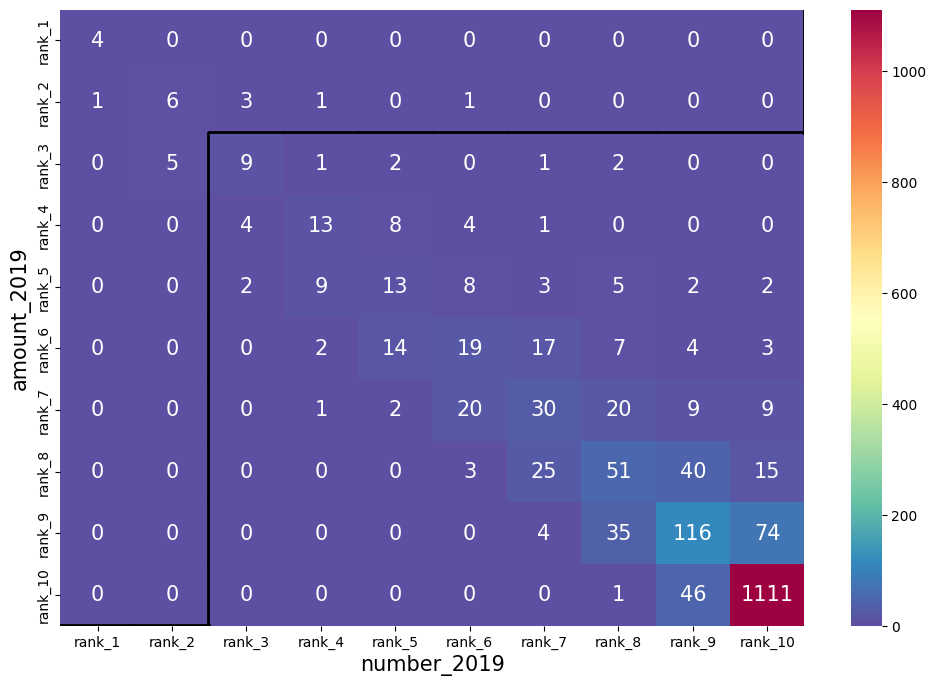

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
cc.draw_histgram(ax=ax, mode=0, threshold=0.01)
plt.show()

ヒストグラムを累積で出したい場合は，```cumtype=True```としてください．その他のオプションは以下の通り．



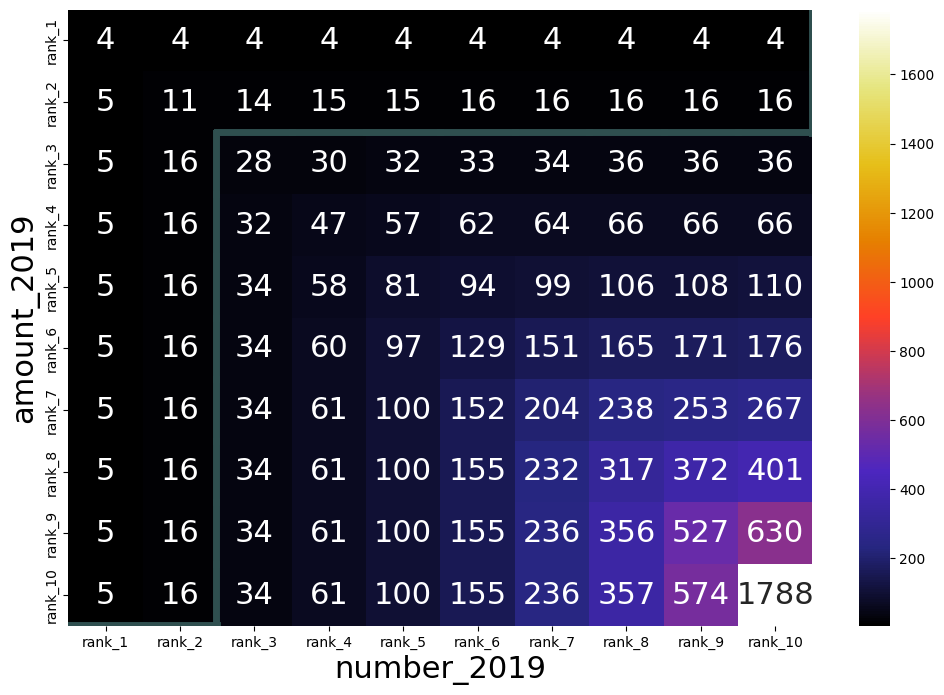

In [8]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
# デフォルト値はfontsize=15, label_fontsize=15, linecolor="black", linewidth=2, cmap="Spectral_r"
cc.draw_histgram(
    ax=ax,
    cumtype=True,
    mode=0,
    threshold=0.01,
    fontsize=22,
    label_fontsize=22,
    linecolor="#2f4f4f",
    linewidth=5,
    cmap="CMRmap"
)
plt.show()

**指標1(=今回は寄付金額)** の結果が欲しい場合は，```mode=1```にしてください．デフォルトは```mode=0```で，その$(i, j)$マスに入るデータの数(=今回は自治体の数)です．

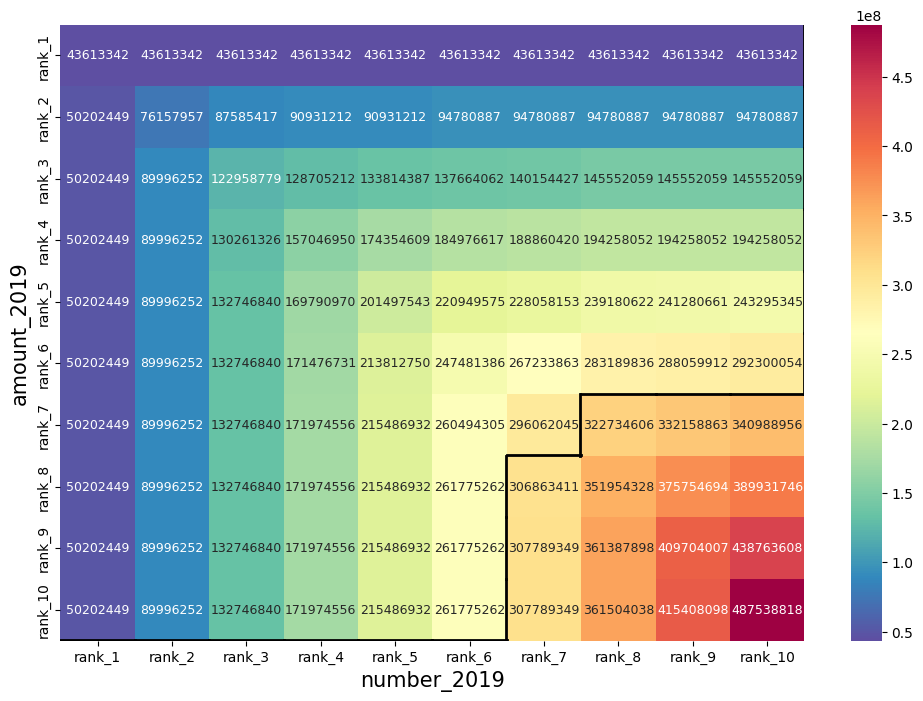

In [9]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
cc.draw_histgram(ax=ax, cumtype=True, mode=1, threshold=0.62, fontsize=9)
plt.show()

このときの結果(寄付金額が上位62%までの自治体)を取得したい場合は，```mode```と```threshold```を指定してください．

In [10]:
cc.get_elements(mode=1, threshold=0.62)

,amount_2019,number_2019,rank_amount_2019,rank_number_2019
City,,,,
都城市,10645341,503916,1,1
白糠町,6733389,460533,1,1
紋別市,7737695,448803,1,1
泉佐野市,18496917,307630,1,1
根室市,6589107,413575,2,1
...,...,...,...,...
大川市,845267,5238,6,10
安曇野市,983077,3149,5,10
箱根町,1031607,5883,5,10


最後に累積分布を出力したい場合，```draw_cum_distribution()```を利用してください．

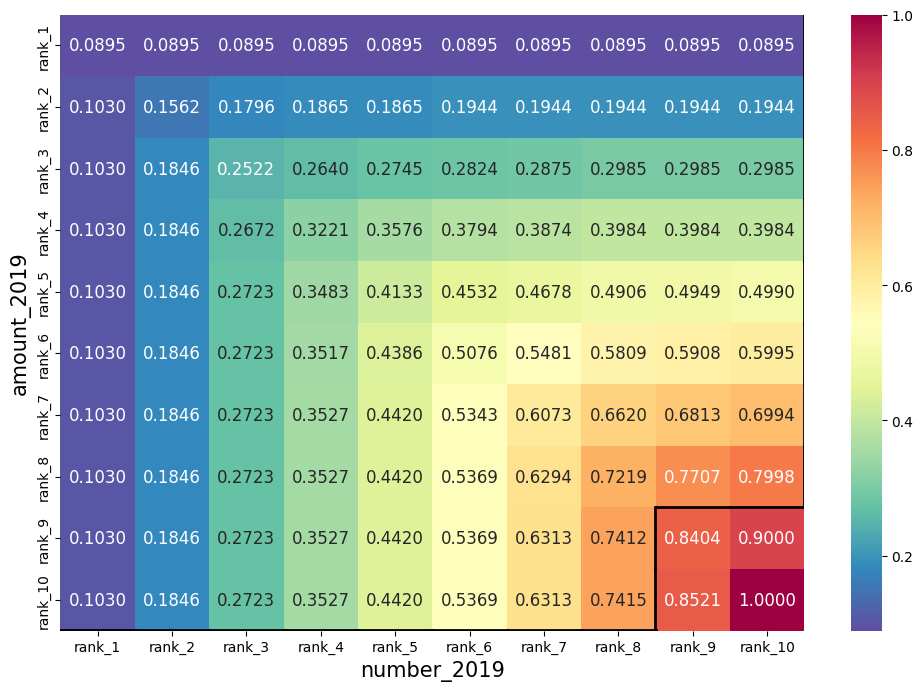

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
cc.draw_cum_distribution(ax, mode=1, threshold=0.8, fontsize=12)
plt.show()

In [12]:
cc.get_elements(mode=1, threshold=0.8)

,amount_2019,number_2019,rank_amount_2019,rank_number_2019
City,,,,
都城市,10645341,503916,1,1
白糠町,6733389,460533,1,1
紋別市,7737695,448803,1,1
泉佐野市,18496917,307630,1,1
根室市,6589107,413575,2,1
...,...,...,...,...
可児市,410675,6528,8,10
箱根町,1031607,5883,5,10
湯沢町,505679,3847,7,10
